In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline 
import seaborn as sns


In [3]:
transaction = pd.read_csv('train_transaction.csv')

In [4]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
def fraud_rate_calc(str,n=1000):
    tmp=pd.DataFrame(transaction.loc[transaction["isFraud"]==1,str].value_counts())
    tmp1=pd.DataFrame(transaction[str].value_counts())
    tmp2=pd.concat([tmp,tmp1],axis=1, join = 'inner')
    tmp2.columns=['fraud','total']
    tmp2['fraud_rate']=round(tmp2.iloc[:,0]/tmp2.iloc[:,1]*100,1)
    tmp3=tmp2.sort_values("fraud_rate",ascending=False)
    tmp4=tmp3.loc[tmp3["total"]>=n]
    return tmp4

In [6]:
tmp=list(transaction.groupby(['addr2', 'addr1']).size().index)
tmp1,tmp2=zip(*tmp)
tmp3=np.concatenate((np.reshape(tmp1,(-1,1)),np.reshape(tmp2,(-1,1))),axis=1)
tmp4 = pd.DataFrame(tmp3,columns=['addr2','addr1'])
tmp4.index=range(1,tmp4.shape[0]+1,1)
tmp5=transaction.groupby(['addr2', 'addr1']).size()
tmp5.index=range(1,tmp5.shape[0]+1,1)
tmp5.name="Count"
tmp7=transaction.groupby(['addr2', 'addr1']).sum('isFraud').loc[:,'isFraud']
tmp7.index=range(1,tmp7.shape[0]+1,1)
tmp6=pd.concat([tmp4,tmp5,tmp7],axis=1)
tmp6['fraud_rate']=round(tmp6['isFraud']/tmp6['Count']*100,1)
tmp6

,addr2,addr1,Count,isFraud,fraud_rate
1,10.0,296.0,8,8,100.0
2,13.0,312.0,1,0,0.0
3,13.0,430.0,5,0,0.0
4,13.0,451.0,1,0,0.0
5,14.0,101.0,1,0,0.0
6,15.0,164.0,1,0,0.0
7,16.0,111.0,1,0,0.0
8,16.0,152.0,7,0,0.0
9,16.0,219.0,1,0,0.0
10,16.0,261.0,1,0,0.0


In [7]:

tmp1=range(1,15,1)
tmp2= map(lambda x: str(x), tmp1)
tmp5=pd.DataFrame([])
for i in tmp2:
    tmp3=['C',i]
    tmp4=(''.join(tmp3))
    tmp5=pd.concat([tmp5,pd.DataFrame(transaction[tmp4].value_counts()[:9])],axis=1)
tmp5

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0.0,NaN,NaN,588111.0,451883.0,372435.0,49066.0,523142.0,447667.0,183795.0,453442.0,1864.0,489199.0,35460.0,35947.0
1.0,316791.0,316261.0,2137.0,111817.0,122883.0,341552.0,51966.0,104994.0,228938.0,100231.0,389692.0,76661.0,199337.0,320189.0
2.0,105071.0,103948.0,180.0,12994.0,34776.0,86103.0,7314.0,15927.0,77829.0,14938.0,89677.0,12242.0,57616.0,93843.0
3.0,51315.0,51770.0,58.0,4949.0,13189.0,35490.0,2033.0,5493.0,32505.0,6417.0,34463.0,4185.0,33033.0,44471.0
4.0,28845.0,28251.0,7.0,1902.0,6828.0,17805.0,1109.0,2817.0,16196.0,2836.0,16051.0,1716.0,23704.0,25390.0
5.0,17922.0,16971.0,NaN,851.0,3763.0,10187.0,481.0,1721.0,8648.0,1806.0,9972.0,1085.0,18355.0,15655.0
6.0,10567.0,10682.0,NaN,597.0,2837.0,6048.0,409.0,1774.0,5760.0,1286.0,5966.0,629.0,15127.0,8563.0
7.0,7263.0,7382.0,NaN,372.0,1906.0,3934.0,267.0,988.0,3529.0,817.0,3663.0,393.0,13001.0,5030.0
8.0,5072.0,5105.0,NaN,NaN,1443.0,3048.0,NaN,1790.0,2548.0,627.0,2892.0,262.0,11424.0,3471.0
9.0,3612.0,3750.0,5.0,273.0,1076.0,2335.0,233.0,718.0,1871.0,553.0,1805.0,177.0,10189.0,2651.0


In [8]:
def create_dist_table(z,m,n=10):
    tmp1=range(1,m+1,1)
    tmp2= map(lambda x: str(x), tmp1)
    tmp5=pd.DataFrame([])
    for i in tmp2:
        tmp3=[z,i]
        tmp4=(''.join(tmp3))
        tmp6=pd.DataFrame(transaction[tmp4].value_counts()).iloc[:n,:]
        tmp5=pd.concat([tmp5,tmp6],axis=1)
    return tmp5

In [9]:
create_dist_table('C',14)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0.0,NaN,NaN,588111.0,451883.0,372435.0,49066.0,523142.0,447667.0,183795.0,453442.0,1864.0,489199.0,35460.0,35947.0
1.0,316791.0,316261.0,2137.0,111817.0,122883.0,341552.0,51966.0,104994.0,228938.0,100231.0,389692.0,76661.0,199337.0,320189.0
2.0,105071.0,103948.0,180.0,12994.0,34776.0,86103.0,7314.0,15927.0,77829.0,14938.0,89677.0,12242.0,57616.0,93843.0
3.0,51315.0,51770.0,58.0,4949.0,13189.0,35490.0,2033.0,5493.0,32505.0,6417.0,34463.0,4185.0,33033.0,44471.0
4.0,28845.0,28251.0,7.0,1902.0,6828.0,17805.0,1109.0,2817.0,16196.0,2836.0,16051.0,1716.0,23704.0,25390.0
5.0,17922.0,16971.0,3.0,851.0,3763.0,10187.0,481.0,1721.0,8648.0,1806.0,9972.0,1085.0,18355.0,15655.0
6.0,10567.0,10682.0,NaN,597.0,2837.0,6048.0,409.0,1774.0,5760.0,1286.0,5966.0,629.0,15127.0,8563.0
7.0,7263.0,7382.0,NaN,372.0,1906.0,3934.0,267.0,988.0,3529.0,817.0,3663.0,393.0,13001.0,5030.0
8.0,5072.0,5105.0,NaN,NaN,1443.0,3048.0,NaN,1790.0,2548.0,627.0,2892.0,262.0,11424.0,3471.0
9.0,3612.0,3750.0,5.0,273.0,1076.0,2335.0,233.0,718.0,1871.0,553.0,1805.0,177.0,10189.0,2651.0


In [10]:
create_dist_table('D',15)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0.000000,280130.0,15124.0,73094.0,166571.0,65377.0,45782.0,21135.0,NaN,4190.0,221930.0,112281.0,42756.0,48840.0,45266.0,174246.0
0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4380.0,NaN,NaN,NaN,NaN,NaN,NaN
0.666666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1097.0,5069.0,NaN,NaN,NaN,NaN,NaN,NaN
0.708333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175.0,5132.0,NaN,NaN,NaN,NaN,NaN,NaN
0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1248.0,5147.0,NaN,NaN,NaN,NaN,NaN,NaN
0.791666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1351.0,5388.0,NaN,NaN,NaN,NaN,NaN,NaN
0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1327.0,5273.0,NaN,NaN,NaN,NaN,NaN,NaN
0.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1304.0,4857.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
create_dist_table('M',9)

,M1,M2,M3,M4,M5,M6,M7,M8,M9
T,319415.0,285468.0,251731.0,NaN,107567.0,193324.0,32901.0,89037.0,205656.0
F,25.0,33972.0,67709.0,NaN,132491.0,227856.0,211374.0,155251.0,38632.0
M0,NaN,NaN,NaN,196405.0,NaN,NaN,NaN,NaN,NaN
M2,NaN,NaN,NaN,59865.0,NaN,NaN,NaN,NaN,NaN
M1,NaN,NaN,NaN,52826.0,NaN,NaN,NaN,NaN,NaN


In [12]:
transaction.iloc[:,:55].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
trans=transaction.iloc[:,:55]

In [14]:
trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
trans1= trans[['isFraud','TransactionAmt']]

In [16]:
trans1.head()

,isFraud,TransactionAmt
0,0,68.5
1,0,29.0
2,0,59.0
3,0,50.0
4,0,50.0


In [17]:
trans1.loc[:,'log_amt']= np.log(trans1.loc[:,"TransactionAmt"])    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [18]:
trans1.head(10)


,isFraud,TransactionAmt,log_amt
0,0,68.5,4.226834
1,0,29.0,3.367296
2,0,59.0,4.077537
3,0,50.0,3.912023
4,0,50.0,3.912023
5,0,49.0,3.891820
6,0,159.0,5.068904
7,0,422.5,6.046189
8,0,15.0,2.708050
9,0,117.0,4.762174


In [19]:
trans1['log_amt'].describe()

count    590540.000000
mean          4.363864
std           0.954037
min          -1.382302
25%           3.768638
50%           4.230753
75%           4.828314
max          10.371533
Name: log_amt, dtype: float64

In [23]:
def fraud_rate_calc_1(df,str,n=1000):
    tmp=pd.DataFrame(df.loc[df["isFraud"]==1,str].value_counts())
    tmp1=pd.DataFrame(df[str].value_counts())
    tmp2=pd.concat([tmp,tmp1],axis=1, join = 'inner')
    tmp2.columns=['fraud','total']
    tmp2['fraud_rate']=round(tmp2.iloc[:,0]/tmp2.iloc[:,1]*100,1)
    tmp3=tmp2.sort_values("fraud_rate",ascending=False)
    tmp4=tmp3.loc[tmp3["total"]>=n]
    return tmp4

In [21]:
# trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=10, labels=range(1,11,1),precision=0)
trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=7,labels=range(1,8,1),precision=0)

<ipython-input-21-1406ed25ffa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=7,labels=range(1,8,1),precision=0)


In [24]:
tmp21=fraud_rate_calc_1(trans1,'q_log_amt',n=1000)
tmp21= tmp21.sort_index()
tmp21

,fraud,total,fraud_rate
1,4297,84420,5.1
2,2636,85773,3.1
3,2376,110846,2.1
4,2442,58079,4.2
5,2293,101580,2.3
6,2660,65766,4.0
7,3959,84076,4.7


<AxesSubplot:title={'center':'Fraud rate across payment size bins'}, xlabel='Bin', ylabel='Rate(%)'>

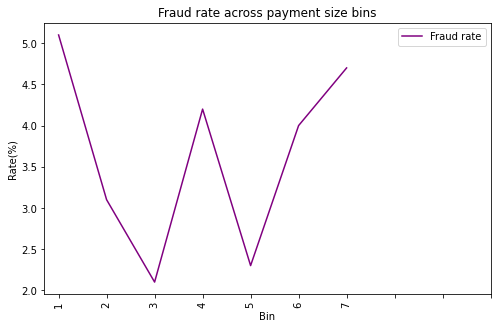

In [25]:
tmp21.plot.line(figsize=(8,5),color='Purple',y='fraud_rate',title= "Fraud rate across payment size bins",label='Fraud rate',
                xticks=range(0,10),rot=90,xlabel='Bin',ylabel='Rate(%)')

In [26]:
bmp=list(map(lambda x: str(x),trans1["TransactionAmt"]))
bmp2=list(map(lambda x: x.split(".")[1],bmp))
bmp3=pd.Series(list(map(lambda x: len(x)>2,bmp2)),name='dec_3dig')
bmp4=pd.DataFrame(bmp3,index=range(len(bmp3))).astype(int)



In [28]:
trans2=pd.concat([trans1,bmp4],axis=1)
# trans2.head(25)

In [29]:
# trans11= trans[['isFraud','card1', 'card2', 'card3', 'card4', 'card5', 'card6']]
trans11= trans[['isFraud','card1', 'card2', 'card3', 'card4', 'card5', 'card6','addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain']]
# trans11[['P_emaildomain']][:20]

In [30]:
# creating column q_card1 for binning of card1
trans12=trans11.copy()
s=fraud_rate_calc("card1").loc[:,'fraud_rate']>= 4.0
card1_index=list(s[s].index.values)
# len(card1_index)
mask=trans12[['card1']].isin(card1_index)| trans12[['card1']].isna()
s_card1 = np.array(trans12[['card1']])
s_card1[~mask] = 99991
q_card1=pd.DataFrame(s_card1.reshape(-1,1),columns=["q_card1"])
# q_card1.head(50)


In [31]:
# creating column q_card2 for binning of card2
s=fraud_rate_calc("card2").loc[:,'fraud_rate']>= 4.0
card2_index=list(s[s].index.values)
# len(card2_index)
mask=trans12[['card2']].isin(card2_index) | trans12[['card2']].isna()
s_card2 = np.array(trans12[['card2']])
s_card2[~mask] = 99992
q_card2=pd.DataFrame(s_card2.reshape(-1,1),columns=["q_card2"])
# q_card2.head(50)



In [32]:
# creating column q_card3 for binning of card3
s=fraud_rate_calc("card3").loc[:,'fraud_rate']>=4.0
card3_index=list(s[s].index.values)
card3_index
mask=trans12[['card3']].isin(card3_index) | trans12[['card3']].isna()
s_card3 = np.array(trans12[['card3']])
s_card3[~mask] = 99993
q_card3=pd.DataFrame(s_card3.reshape(-1,1),columns=["q_card3"])
# q_card3.head(100)



In [33]:
# creating column q_card5 for binning of card5
s=fraud_rate_calc("card5").loc[:,'fraud_rate']>=4.0
card5_index=list(s[s].index.values)
card5_index
mask=trans12[['card5']].isin(card5_index) | trans12[['card5']].isna()
s_card5 = np.array(trans12[['card5']])
s_card5[~mask] = 99995
q_card5=pd.DataFrame(s_card5.reshape(-1,1),columns=["q_card5"])
# q_card5.head(100)



In [34]:
# creating column q_addr1 for binning of addr1
s=fraud_rate_calc("addr1").loc[:,'fraud_rate']>=4.0

addr1_index=list(s[s].index.values)
addr1_index
mask=trans12[['addr1']].isin(addr1_index) | trans12[['addr1']].isna()
s_addr1 = np.array(trans12[['addr1']])
s_addr1[~mask] = 99981
q_addr1=pd.DataFrame(s_addr1.reshape(-1,1),columns=["q_addr1"])
# q_addr1[:50]

In [35]:
# creating column q_addr2 for binning of addr2

s=fraud_rate_calc("addr2",500).loc[:,'fraud_rate']>=4.0

addr2_index=list(s[s].index.values)
addr2_index
mask=trans12[['addr2']].isin(addr2_index) | trans12[['addr2']].isna()
s_addr2 = np.array(trans12[['addr2']])
s_addr2[~mask] = 99982
q_addr2=pd.DataFrame(s_addr2.reshape(-1,1),columns=["q_addr2"])
# q_addr2.head(50)

In [36]:
# creating column q_addr_na for binning of NA vs non NA in addr1

mask= trans12[['addr1']].isna()
s_addr_na = np.zeros(len(trans12[['addr1']])).reshape(-1,1)
s_addr_na[mask] = 1
q_addr_na=pd.DataFrame(s_addr_na.reshape(-1,1),columns=["q_addr_na"])
# np.sum(q_addr_na)

In [37]:
# creating column q_dist1 for binning of dist1

trans12['q_dist1'] = pd.qcut(trans12['dist1'], q=7,labels=range(1,8,1),precision=0)
trans12['q_dist1'].value_counts()

mask= trans12[['q_dist1']] == 7

s_dist1 = np.zeros(len(trans12[['dist1']])).reshape(-1,1)
s_dist1[mask] = 1

q_dist1=pd.DataFrame(s_dist1.reshape(-1,1),columns=["q_dist1"])
# q_dist1.head(50)

In [38]:
# creating column q_dist_na for binning of NA vs non NA in dist1

mask= trans12[['dist1']].isna()
s_dist_na = np.zeros(len(trans12[['dist1']])).reshape(-1,1)
s_dist_na[mask] = 1
q_dist_na=pd.DataFrame(s_dist_na.reshape(-1,1),columns=["q_dist_na"])
# q_dist_na.head(100)

In [39]:
# creating column q_P_email for binning of P_emaildomain
s=fraud_rate_calc("P_emaildomain").loc[:,'fraud_rate']>= 4.0
P_email_index=list(s[s].index.values)
P_email_index
mask=trans12[['P_emaildomain']].isin(P_email_index) | trans12[['P_emaildomain']].isna()

s_P_email = np.array(trans12[['P_emaildomain']])
s_P_email[~mask] = 99971
q_P_email=pd.DataFrame(s_P_email.reshape(-1,1),columns=["q_P_email"])
# q_P_email.head(100)

In [40]:
# creating column q_R_email for binning of R_emaildomain
s=fraud_rate_calc("R_emaildomain").loc[:,'fraud_rate']>= 4.0

R_email_index=list(s[s].index.values)
R_email_index
mask=trans12[['R_emaildomain']].isin(R_email_index) | trans12[['R_emaildomain']].isna()


s_R_email = np.array(trans12[['R_emaildomain']])
s_R_email[~mask] = 99972

q_R_email=pd.DataFrame(s_R_email.reshape(-1,1),columns=["q_R_email"])
# q_R_email.head(100)

In [41]:
# creating column q_dist_na for binning of NA vs non NA in dist1

mask= trans12[['R_emaildomain']].isna()

s_R_email_na = np.zeros(len(trans12[['R_emaildomain']])).reshape(-1,1)
s_R_email_na[mask] = 1

q_R_email_na=pd.DataFrame(s_R_email_na.reshape(-1,1),columns=["q_R_email_na"])
# np.sum(q_R_email_na)

In [42]:
# combine q_log_amt values 3 and 5 converting 5 to 3
trans3=trans2.copy()
trans3_r= trans3['q_log_amt'].replace(to_replace=5,value=3)

trans3_rdf = pd.DataFrame(trans3_r,columns=["q_log_amt"])
trans3_d=trans3.drop('q_log_amt',axis=1)
trans3_f=pd.concat([trans3_d,trans3_rdf],axis=1)

# trans3_f.head(50)

In [45]:
#combine all features together
features1= pd.concat([trans3_f[['q_log_amt','dec_3dig']],transaction[['ProductCD']],q_card1,q_card2,q_card3,transaction[['card4']],q_card5,transaction[['card6']],q_addr1,q_addr2,q_addr_na,q_dist1,q_dist_na,q_P_email,q_R_email,q_R_email_na],axis=1)

In [46]:
#create a copy of the features df for the purpose of creating dummies
fc=features1.copy()

In [47]:
# dummies for log_amt
log_amt_d = pd.get_dummies(fc['q_log_amt'], prefix='log_amt', prefix_sep='__')
log_amt_d = log_amt_d.drop('log_amt__3', axis=1)
# log_amt_d.head(20)

In [48]:
# dummies for ProductCD
ProductCD_d = pd.get_dummies(fc['ProductCD'], prefix='ProductCD', prefix_sep='__')
ProductCD_d = ProductCD_d.drop('ProductCD__W', axis=1)
# ProductCD_d.head(20)

In [49]:
# dummies for q_card1
q_card1_d = pd.get_dummies(fc['q_card1'], prefix='q_card1', prefix_sep='__')
q_card1_d = q_card1_d.drop('q_card1__99991', axis=1)
# q_card1_d.head(20)

In [50]:
# dummies for q_card2
q_card2_d = pd.get_dummies(fc['q_card2'], prefix='q_card2', prefix_sep='__')
q_card2_d = q_card2_d.drop('q_card2__99992.0', axis=1)
# q_card2_d.head(20)

In [51]:
# dummies for q_card3
q_card3_d = pd.get_dummies(fc['q_card3'], prefix='q_card3', prefix_sep='__')
q_card3_d = q_card3_d.drop('q_card3__99993.0', axis=1)
# q_card3_d.head(20)

In [52]:
# dummies for card4
card4_d = pd.get_dummies(fc['card4'], prefix='card4', prefix_sep='__')
card4_d = card4_d.drop('card4__visa', axis=1)
# card4_d.head(20)

In [53]:
# dummies for q_card5
q_card5_d = pd.get_dummies(fc['q_card5'], prefix='q_card5', prefix_sep='__')
q_card5_d = q_card5_d.drop('q_card5__99995.0', axis=1)
# q_card5_d.head(20)

In [55]:
# dummies for q_addr1
q_addr1_d = pd.get_dummies(fc['q_addr1'], prefix='q_addr1', prefix_sep='__')
q_addr1_d = q_addr1_d.drop('q_addr1__99981.0', axis=1)
# q_addr1_d.head(20)

In [56]:
# dummies for card6
card6_d = pd.get_dummies(fc['card6'], prefix='card6', prefix_sep='__')
card6_d = card6_d.drop('card6__debit', axis=1).drop('card6__charge card', axis=1).drop('card6__debit or credit', axis=1)
# card6_d.head(20)

In [57]:
# dummies for q_addr2
q_addr2_d = pd.get_dummies(fc['q_addr2'], prefix='q_addr2', prefix_sep='__')
q_addr2_d = q_addr2_d.drop('q_addr2__99982.0', axis=1)
# q_addr2_d.head(20)

In [58]:
# dummies for q_P_email
q_P_email_d = pd.get_dummies(fc['q_P_email'], prefix='q_P_email', prefix_sep='__')
q_P_email_d = q_P_email_d.drop('q_P_email__99971', axis=1)
# q_P_email_d.head(20)

In [59]:
# dummies for q_R_email
q_R_email_d = pd.get_dummies(fc['q_R_email'], prefix='q_R_email', prefix_sep='__')
q_R_email_d = q_R_email_d.drop('q_R_email__99972', axis=1)
# q_R_email_d.head(20)

In [60]:
# create features df putting together all dummies
features2= pd.concat([features1[['dec_3dig','q_addr_na','q_dist1','q_dist_na','q_R_email_na']],log_amt_d,ProductCD_d,q_card1_d,q_card2_d,q_card3_d,card4_d,q_card5_d,card6_d,q_addr1_d,q_addr2_d,q_P_email_d,q_R_email_d],axis=1)

In [61]:
features2.head(10)

,dec_3dig,q_addr_na,q_dist1,q_dist_na,q_R_email_na,log_amt__1,log_amt__2,log_amt__4,log_amt__6,log_amt__7,ProductCD__C,ProductCD__H,ProductCD__R,ProductCD__S,q_card1__1893,q_card1__2256,q_card1__2455,q_card1__2616,q_card1__3154,q_card1__4461,q_card1__5812,q_card1__6019,q_card1__6170,q_card1__7585,q_card1__7664,q_card1__8755,q_card1__9002,q_card1__9026,q_card1__9300,q_card1__9633,q_card1__9803,q_card1__10486,q_card1__11201,q_card1__13832,q_card1__15063,q_card1__15885,q_card1__16062,q_card1__16075,q_card2__103.0,q_card2__130.0,q_card2__142.0,q_card2__158.0,q_card2__177.0,q_card2__181.0,q_card2__204.0,q_card2__296.0,q_card2__327.0,q_card2__375.0,q_card2__404.0,q_card2__408.0,q_card2__417.0,q_card2__453.0,q_card2__500.0,q_card2__514.0,q_card2__545.0,q_card2__548.0,q_card2__553.0,q_card2__583.0,q_card3__144.0,q_card3__185.0,card4__american express,card4__discover,card4__mastercard,q_card5__102.0,q_card5__137.0,q_card5__138.0,q_card5__162.0,q_card5__195.0,q_card5__197.0,q_card5__219.0,card6__credit,q_addr1__122.0,q_addr1__203.0,q_addr1__308.0,q_addr1__324.0,q_addr2__60.0,q_addr2__96.0,q_P_email__gmail.com,q_P_email__hotmail.com,q_P_email__outlook.com,q_R_email__gmail.com,q_R_email__hotmail.com,q_R_email__icloud.com,q_R_email__outlook.com,q_R_email__yahoo.com
0,0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0.0,0.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
features2.shape

(590540, 85)

In [63]:
#create target vector
target2=transaction[['isFraud']]

In [64]:
target2.shape


(590540, 1)

In [83]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logistic = LogisticRegression(C=1e4,class_weight = 'balanced', max_iter=1000)
logistic.fit(features2, np.ravel(target2))
logistic.score(features2, np.ravel(target2))

0.7689860128018424

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target2, logistic.predict(features2))

array([[440740, 129137],
       [  7286,  13377]])

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision_score(target2, logistic.predict(features2))

0.09386446243877794

In [77]:
recall_score(target2, logistic.predict(features2))

0.6473890528964816

In [78]:
f1_score(target2, logistic.predict(features2))

0.16395693020462443

In [79]:
roc_auc_score(target2, logistic.predict(features2))

0.7103920067817163

In [84]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=1e4, l1_ratio=0, class_weight = 'balanced',alpha=1e-4)

In [85]:
sgd.fit(features2, np.ravel(target2))
sgd.score(features2, np.ravel(target2))

0.7465794019033427

In [87]:
logisticCV = LogisticRegressionCV(class_weight = 'balanced', max_iter=10000,cv=10)

In [88]:
logisticCV.fit(features2, np.ravel(target2))


LogisticRegressionCV(class_weight='balanced', cv=10, max_iter=10000)

In [89]:
logisticCV.score(features2, np.ravel(target2))

0.7689758526094761

In [92]:
logisticCV.coef_

array([[-0.04024406,  0.42923016,  0.69612846,  0.14368953, -0.0345299 ,
        -0.32674807, -0.30594982,  0.17476745,  0.46102525,  0.83688008,
        -0.18352649,  0.01903772, -0.73464543,  0.23529537,  0.55702667,
         0.47133472,  0.37751661, -0.34698314, -0.50154663,  0.33051097,
         0.07005559, -0.00438925,  1.35589161, -0.98115894,  0.9764164 ,
        -0.12517128,  1.5201497 ,  0.65060699, -0.52241424,  0.23616552,
         0.79881435,  0.41657926, -0.63538111,  0.62169025,  1.51121123,
        -0.01473842, -0.34775017, -0.02670195, -0.30558773,  0.59449483,
         0.91176418,  0.38627289,  0.30563347,  0.47287112, -0.79006478,
         0.24283623,  0.71631427, -1.01906368,  0.22980194, -0.38725001,
         0.641425  ,  0.24868535, -0.08626122,  0.13590323, -0.90692926,
         2.08410855,  1.35926513, -0.0345009 , -0.30414024,  1.76093367,
        -0.42481142,  0.16210006, -0.24216778,  0.3350186 , -0.09312511,
        -0.68109869,  0.4831698 ,  0.23146119, -0.1

In [93]:
sgd = SGDClassifier( max_iter=1e4, l1_ratio=0, class_weight = 'balanced',alpha=1e-4)

In [94]:
sgd.fit(features2, np.ravel(target2))
sgd.score(features2, np.ravel(target2))

0.763553696616656

In [97]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

In [99]:

grid_para_forest = { 
    'n_estimators': list([50,60,70]),  
    'class_weight' : list(['balanced']),
    'bootstrap':[True]   
}

from sklearn.model_selection import GridSearchCV
grid_search_forest = GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(features2, np.ravel(target2)) 

CPU times: user 39.6 s, sys: 581 ms, total: 40.2 s
Wall time: 4min 26s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'n_estimators': [50, 60, 70]})

In [100]:
grid_search_forest.best_score_

0.8339756832729368

In [103]:
tree_final = grid_search_forest.best_estimator_

feature_importance = list(zip(features2.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)[:20]

[('q_card3__185.0', 0.06527049731086984),
 ('q_R_email__gmail.com', 0.06267476176944307),
 ('card6__credit', 0.060531745473468186),
 ('ProductCD__C', 0.05927277108299678),
 ('log_amt__7', 0.05387373610168509),
 ('dec_3dig', 0.05382276624172568),
 ('q_R_email_na', 0.05089363256048076),
 ('q_addr_na', 0.04597202198075419),
 ('q_P_email__gmail.com', 0.03676225470174343),
 ('log_amt__6', 0.028926360582433464),
 ('log_amt__1', 0.025010785637928436),
 ('card4__mastercard', 0.022405924119713795),
 ('log_amt__2', 0.021195545200033514),
 ('ProductCD__H', 0.02047738851076046),
 ('q_P_email__hotmail.com', 0.01941305236783837),
 ('q_dist_na', 0.01750171479528263),
 ('log_amt__4', 0.017325056570000465),
 ('q_dist1', 0.016308769742753762),
 ('q_R_email__yahoo.com', 0.015520253718457501),
 ('q_card5__195.0', 0.015425514443388733)]

<BarContainer object of 20 artists>

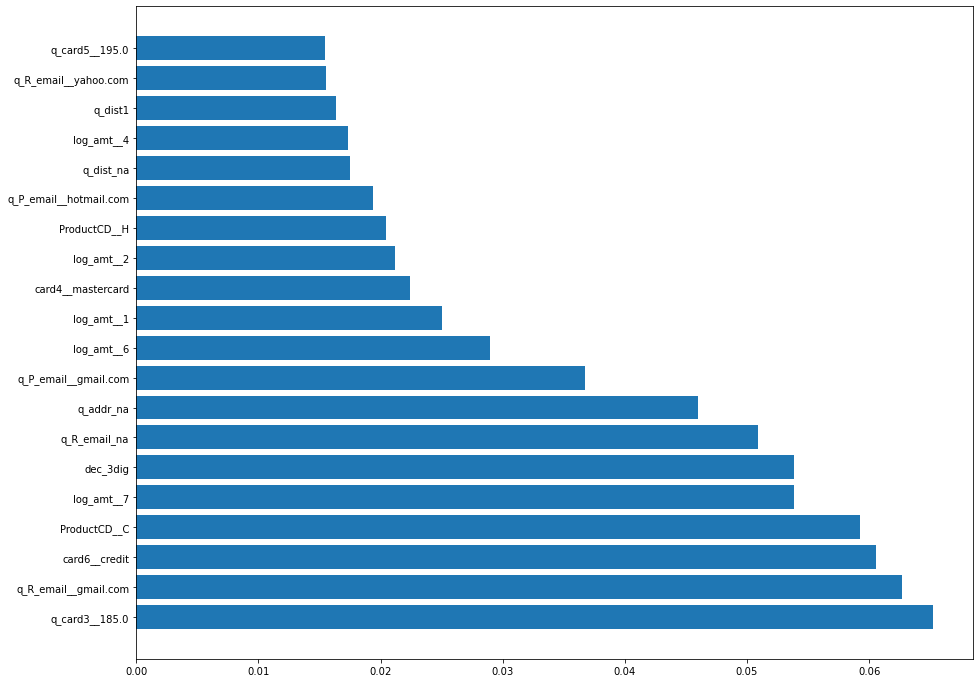

In [104]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True)[:20])
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [105]:
gbm = ensemble.GradientBoostingClassifier()

In [106]:
gbm.fit(features2, np.ravel(target2))

GradientBoostingClassifier()

In [107]:
print('The accuracy is %.3f' %(gbm.score(features2, np.ravel(target2))))

The accuracy is 0.966


In [108]:
sorted(zip(features2.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)

[('q_card3__185.0', 0.27709839132576536),
 ('q_R_email__gmail.com', 0.13621714907107546),
 ('card6__credit', 0.09954559763728797),
 ('log_amt__7', 0.07008596851876199),
 ('q_card1__15063', 0.06520717025715733),
 ('ProductCD__H', 0.04090395310129151),
 ('q_addr_na', 0.02739200912107914),
 ('q_card2__130.0', 0.022910466494166913),
 ('log_amt__6', 0.020572309612301158),
 ('ProductCD__S', 0.01845562237624337),
 ('q_card1__15885', 0.01823550351409937),
 ('q_card2__142.0', 0.017648835618591083),
 ('q_R_email_na', 0.01695174944692362),
 ('q_R_email__outlook.com', 0.01429580416891943),
 ('q_card1__9002', 0.013009872791724567),
 ('ProductCD__R', 0.010586485906210497),
 ('q_card2__296.0', 0.01015211665053816),
 ('q_P_email__gmail.com', 0.008627253035331416),
 ('q_card5__102.0', 0.007825781760761043),
 ('q_R_email__icloud.com', 0.007633198493346239),
 ('q_card2__158.0', 0.0071901375253166176),
 ('q_card2__327.0', 0.006390276508324758),
 ('log_amt__1', 0.006266638465632524),
 ('q_card5__138.0', 0.

<BarContainer object of 20 artists>

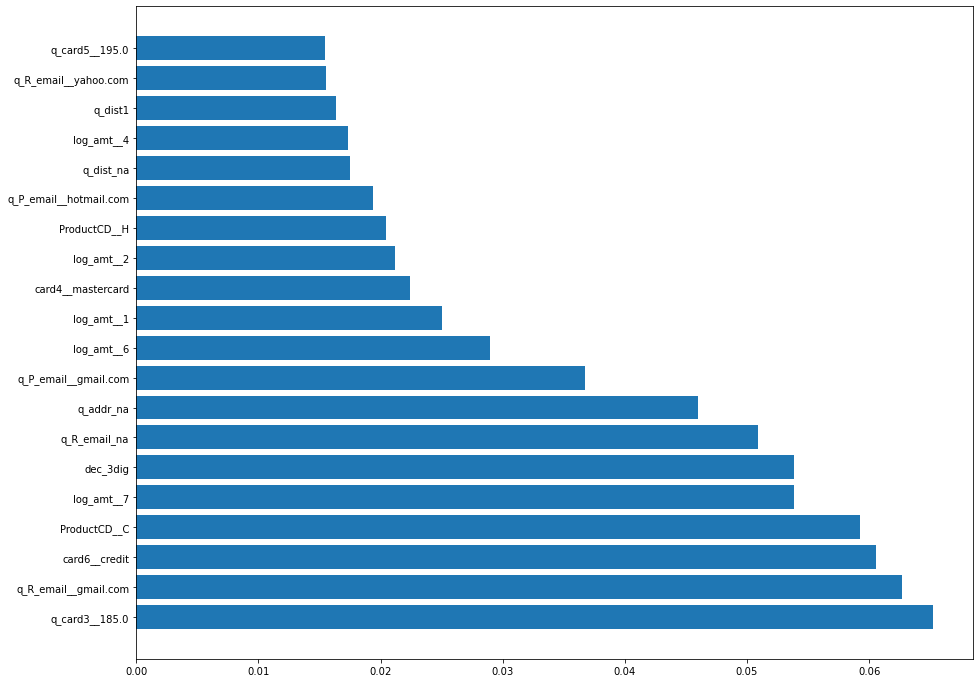

In [109]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True)[:20])
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [110]:
confusion_matrix(target2, gbm.predict(features2))

array([[569774,    103],
       [ 20183,    480]])

In [111]:
target_predict = grid_search_forest.predict(features2)
confusion_matrix(target2, target_predict)

array([[484346,  85531],
       [  6442,  14221]])

In [112]:
precision_score(target2, target_predict)

0.1425635576229048

In [113]:
recall_score(target2, target_predict)

0.6882350094371582

In [114]:
roc_auc_score(target2, target_predict)

0.7690741181632348

In [117]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight = 'balanced',max_iter=10000)

In [118]:
svc.fit(features2, np.ravel(target2))

LinearSVC(class_weight='balanced', max_iter=10000)

In [119]:
target_predict = svc.predict(features2)
confusion_matrix(target2, target_predict)

array([[439499, 130378],
       [  7227,  13436]])

In [120]:
precision_score(target2, target_predict)

0.09342623110406498

In [121]:
recall_score(target2, target_predict)

0.6502443981996806

In [122]:
roc_auc_score(target2, target_predict)

0.7107308479837223

In [126]:
svc.coef_

array([[-0.0103937 ,  0.18858606,  0.30453158,  0.05932839,  0.00364726,
        -0.10984852, -0.10675316,  0.06343525,  0.19836825,  0.37797976,
        -0.04217403,  0.0524338 , -0.26035896,  0.14863861,  0.2680833 ,
         0.15347513,  0.17924312, -0.13475695, -0.18608992,  0.13489086,
         0.03422927,  0.00246009,  0.62373829, -0.42676821,  0.45085095,
        -0.04397192,  0.63723506,  0.2080073 , -0.19943546,  0.20183016,
         0.33891611,  0.20395278, -0.13099376,  0.24574766,  0.60310502,
        -0.04961736, -0.0974597 ,  0.02543918, -0.08795575,  0.08198126,
         0.29844766,  0.18639908,  0.09035633,  0.22083852, -0.24732147,
        -0.00143285,  0.30347408, -0.26976681,  0.1061105 , -0.03291026,
         0.29101216,  0.11553309, -0.0050632 ,  0.03862813, -0.28087952,
         0.92295763,  0.61091726, -0.00820704, -0.14171996,  0.58543454,
        -0.18514728,  0.07972929, -0.09328549,  0.13169291, -0.03576215,
        -0.18576175,  0.2173313 ,  0.10242996, -0.0